## Demo of code module for embedding models

The Python file "Embedding_models.py" is a file that contains all of the code relevant for encoder embedding models. The file collects much of the code that was implemented in the computational essay "CE1_embedding_models.ipynb", but with some improvements. In particular, we have collected all the circuit analysis tools in a class "EmbeddingCircuitAnalyzer". This class has been sufficiently generalized, so that it will be possible to use the class to analyze any desired embedding model (and not just the one we happened to use in our project). Below, we will show a quick demo of how to use this class. If you wish to learn how the code works, you should either check out the detailed documentation in the file "Embedding_models.py", or read the corresponding computational essay (where we define all of the relevant functions from scratch, though for the specific case of the multi-qa-MiniLM-L6-cos-v1 model). 

The EmbeddingCircuitAnalyzer class takes on a number of different arguments. These arguments are typically functions or instances of other classes (such as an instance of a particular embedding model). In the function "main()" inside the "Embedding_models.py" file, we have showed a specific example of how all of these arguments may be defined in the particular case of the multi-qa-MiniLM-L6-cos-v1 model. In the code block below, we define an instance of the EmbeddingCircuitAnalyzer class by using the objects defined inside the "main()" function. 

In [1]:
import Embedding_models

Embedding_models.main()

# The main circuit analyzer object
CircuitAnalyzer = Embedding_models.EmbeddingCircuitAnalyzer(Embedding_models.model,Embedding_models.final_layer,
                                                            Embedding_models.tokenizer,Embedding_models.embed,
                                                            Embedding_models.forward_attention_output,Embedding_models.forward_MLP_output,
                                                            Embedding_models.final_attention_output,Embedding_models.final_MLP_output)

Once the circuit analyzer object has been created, we can immidiately use the circuit analysis techniques. For example, in the code block below, we create a generic example text prompt. We then use the "visualize_activations" function to make a heatmap of the internal activations of all of the attention heads from a forward pass on the example text. 

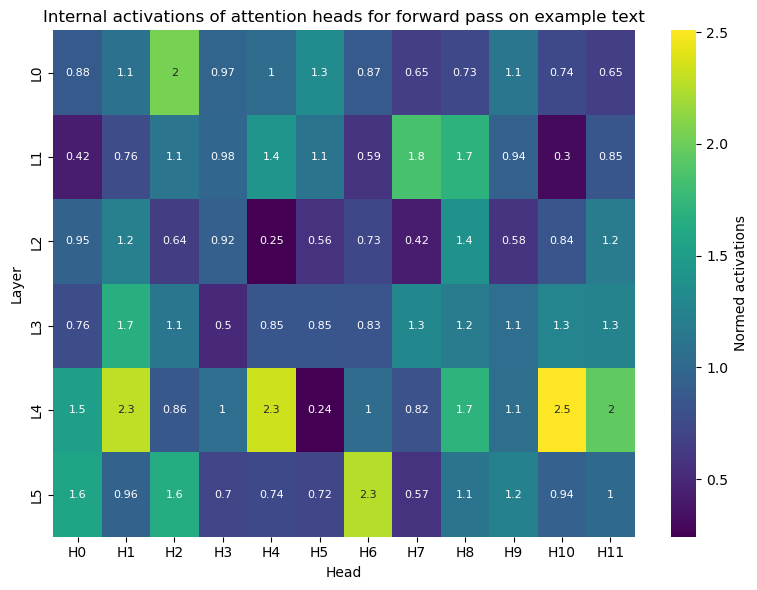

In [2]:
example_text = "This is an example text"

CircuitAnalyzer.visualize_activations(text = example_text,title = "Internal activations of attention heads for forward pass on example text", 
                                      node_type = "attn")

In the code example below, we create a corrupted prompt corresponding to the the example text prompt above. Then we perform an activation patching on the attention head activations and find the corresponding relative change in cosine embedding distance between the clean and corrupted prompts. The results are shown on a heatmap, where each value corresponds to a particular attention head in a particular layer. 

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


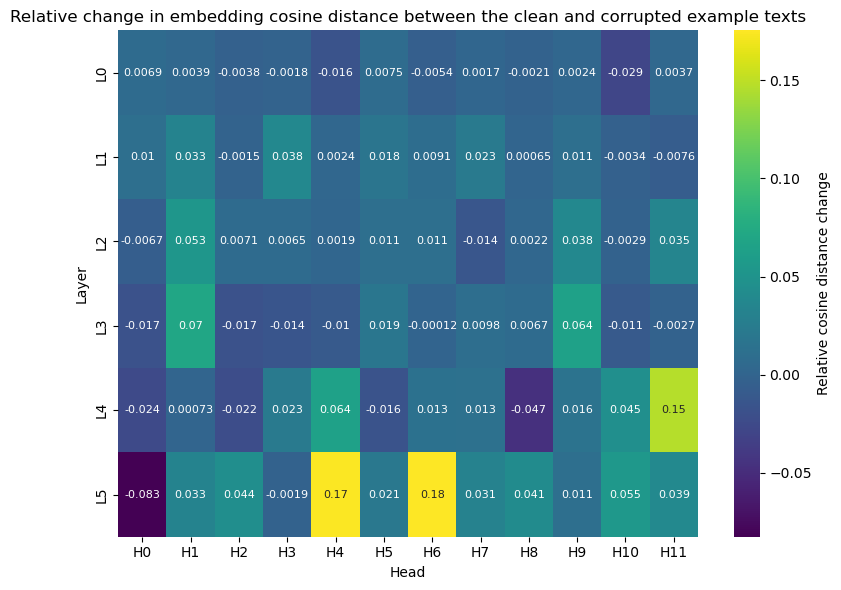

In [3]:
corrupted_example_text = "This is an example prompt"

CircuitAnalyzer.intervene_on_many_nodes(example_text, corrupted_example_text,intervention_type = "activation patching", 
            title="Relative change in embedding cosine distance between the clean and corrupted example texts", 
            node_type = "attn")

One can similarly use the other techniques that are contained in the EmbeddingCircuitAnalyzer class. 